In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/mischafubler/Dropbox/Mischa/Bermuda 2021/EIT Big Data for Utilities/Assignment 2 Resources/iris.csv')
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [14]:
sep_width = df['sepal.width']
print('Sepal Width mean:',sep_width.mean())
print('Sepal Width Std Dev.:.', sep_width.std())
norm = (sep_width - sep_width.mean()) / sep_width.std()
print (norm)

Sepal Width mean: 3.0573333333333337
Sepal Width Std Dev.:. 0.4358662849366982
0      1.015602
1     -0.131539
2      0.327318
3      0.097889
4      1.245030
         ...   
145   -0.131539
146   -1.278680
147   -0.131539
148    0.786174
149   -0.131539
Name: sepal.width, Length: 150, dtype: float64


<AxesSubplot:ylabel='Frequency'>

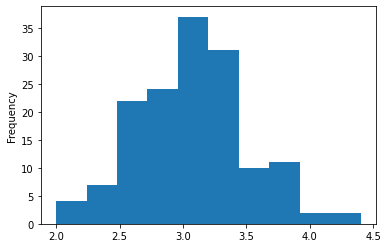

In [19]:
sep_width.plot.hist()